C:\Users\abdul\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\abdul\miniconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

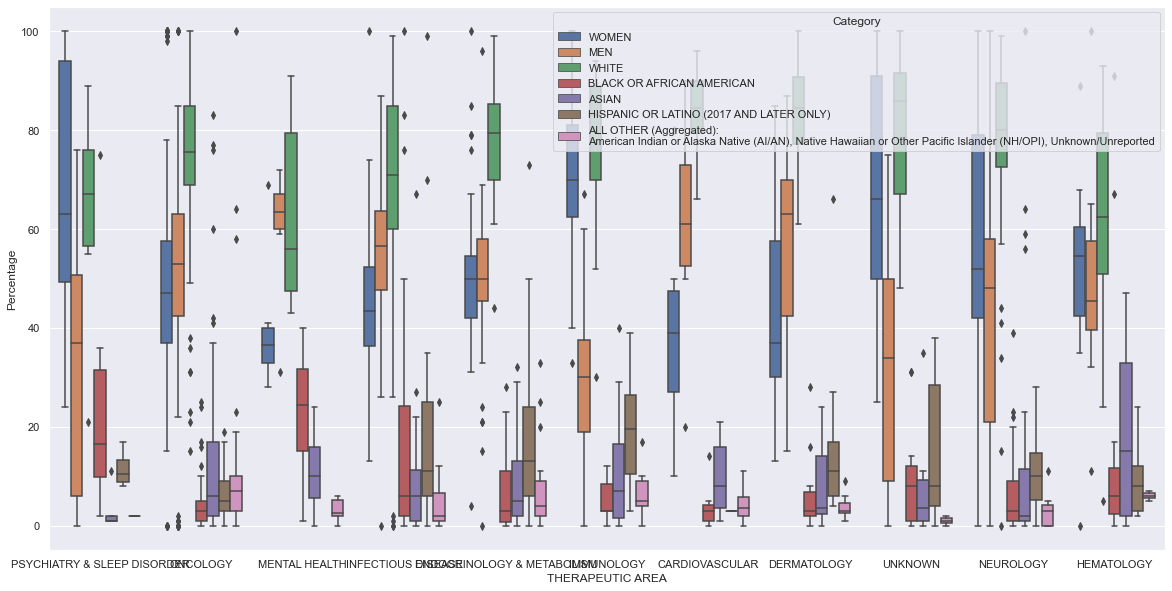

In [1]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
import seaborn as sns
from pandas import ExcelWriter
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sp
import scikit_posthocs as ph
from scipy.stats import ttest_1samp
from statsmodels.stats.power import TTestIndPower
from numpy import array
from matplotlib import pyplot
import researchpy as rp


def desc_stats(df):
    data_all = {"Women":[df["WOMEN"].astype(float).mean(),df["WOMEN"].astype(float).median(),df["WOMEN"].astype(float).var(),df["WOMEN"].astype(float).std(),
                    df["WOMEN"].astype(float).quantile(.25),df["WOMEN"].astype(float).quantile(.75),df['WOMEN'].astype(float).quantile(.75) - df['WOMEN'].astype(float).quantile(.25)],
           "Men":[df["MEN"].astype(float).mean(),df["MEN"].astype(float).median(),df["MEN"].astype(float).var(),df["MEN"].astype(float).std(),
                    df["MEN"].astype(float).quantile(.25),df["MEN"].astype(float).quantile(.75),df['MEN'].astype(float).quantile(.75) - df['MEN'].astype(float).quantile(.25)],
           "White": [df["WHITE"].astype(float).mean(),df["WHITE"].astype(float).median(),df["WHITE"].astype(float).var(),df["WOMEN"].astype(float).std(),
                    df["WHITE"].astype(float).quantile(.25),df["WHITE"].astype(float).quantile(.75),df['WHITE'].astype(float).quantile(.75) - df['WHITE'].astype(float).quantile(.25)],
           "Black": [df["BLACK OR AFRICAN AMERICAN"].astype(float).mean(),df["BLACK OR AFRICAN AMERICAN"].astype(float).median(),df["BLACK OR AFRICAN AMERICAN"].astype(float).var(),df["BLACK OR AFRICAN AMERICAN"].astype(float).std(),
                    df["BLACK OR AFRICAN AMERICAN"].astype(float).quantile(.25),df["BLACK OR AFRICAN AMERICAN"].astype(float).quantile(.75),df['BLACK OR AFRICAN AMERICAN'].astype(float).quantile(.75) - df['BLACK OR AFRICAN AMERICAN'].astype(float).quantile(.25)],
           "Asian": [df["ASIAN"].astype(float).mean(),df["ASIAN"].astype(float).median(),df["ASIAN"].astype(float).var(),df["ASIAN"].astype(float).std(),
                    df["ASIAN"].astype(float).quantile(.25),df["ASIAN"].astype(float).quantile(.75),df['ASIAN'].astype(float).quantile(.75) - df['ASIAN'].astype(float).quantile(.25)],
           "Hispanic":[df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).mean(),df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).median(),df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).var(),df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).std(),
                    df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).quantile(.25),df["HISPANIC OR LATINO (2017 AND LATER ONLY)"].astype(float).quantile(.75),df['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float).quantile(.75) - df['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float).quantile(.25)] ,
           "All other": [df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).mean(),df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).median(),df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).var(),df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).std(),
                    df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).quantile(.25),df["ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported"].astype(float).quantile(.75),df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float).quantile(.75) - df['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float).quantile(.25)]}
    return pd.DataFrame(data_all, index = index1)

df = pd.read_csv('datafixed.csv') 
df = df.replace(to_replace="%", value="", regex=True)
df = df.replace(to_replace="<1", value="0", regex=True)
df = df.replace(to_replace="< 1", value="0", regex=True)
df = df.replace(to_replace="NR", value=np.nan, regex=True)
df = df.replace(to_replace="Not reported", value=np.nan, regex=True)
df["MEN"] = 100 - df["WOMEN"].astype(float)
#display(df)


index1 = ["Mean","Median","Variance","Standard Deviation","Q1","Q3","IQR"]
dfo = df
general = desc_stats(df)
#display(general) 
desc2015 = desc_stats(dfo[dfo['YEAR'] == 2015])
desc2016 = desc_stats(dfo[dfo['YEAR'] == 2016])
desc2017 = desc_stats(dfo[dfo['YEAR'] == 2017])
desc2018 = desc_stats(dfo[dfo['YEAR'] == 2018])
desc2019 = desc_stats(dfo[dfo['YEAR'] == 2019])
desc2020 = desc_stats(dfo[dfo['YEAR'] == 2020])

dfqq = pd.melt(dfo, id_vars=['THERAPEUTIC AREA'], value_vars=['WOMEN','MEN','WHITE','BLACK OR AFRICAN AMERICAN','ASIAN','HISPANIC OR LATINO (2017 AND LATER ONLY)','ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'], var_name='Category', value_name='Percentage')
sns.set(rc={'figure.figsize':(20,10)})
dfqq['Percentage'] = dfqq['Percentage'].astype(float)  #for some reason, the melt function is storing the values of the percentage column as text, and type casting it fixes the issue
sns_plot = sns.boxplot(data=dfqq, x="THERAPEUTIC AREA", y="Percentage", hue = 'Category')
fig = sns_plot.get_figure()
fig.savefig("Boxplots.png") 

#the data files year.xlsx and cat.xlsx contain the means for each year for each racial catagory and the means for each therapeutic area for each racial category.
#the files have been included in the zip file - uncomment this chain to run the code to obtain the visualizations.
#the two files were manually created from the running the desc_stats function above and then manually compiled into an excel file
#this was done because I could not find a way to loop through it in a way I needed to be able to run the melt function properly

#dfx = pd.read_excel('year.xlsx') 
#dfx = pd.melt(dfx, id_vars=['Year'], value_vars=['Women','Men','White','Black','Asian','Hispanic','Other'], var_name='Category', value_name='Mean Percentage')
#sns.set(rc={'figure.figsize':(20,10)})
#sns_plot =  sns.lineplot(data=dfx, x='Year' , y='Mean Percentage', hue = 'Category')
#dfc = pd.read_excel('cat.xlsx') 
#dfc = pd.melt(dfc, id_vars=['Therapeutic Area'], value_vars=['Women','Men','White','Black','Asian','Hispanic','Other'], var_name='Category', value_name='Mean Percentage')
#sns.set(rc={'figure.figsize':(22,12)})
#sns_plot = sns.barplot(data=dfc, x='Therapeutic Area' , y='Mean Percentage', hue = 'Category')
#fig = sns_plot.get_figure()
#fig.savefig("Yearly.png") 

#dfo = dfo[(dfo['UNITED STATES (2017 ONLY)'].astype(float) < 5)] 
#df95 = dfo[(dfo['UNITED STATES (2017 ONLY)'].astype(float) > 95)]
#df50 = dfo[(dfo['UNITED STATES (2017 ONLY)'].astype(float) > 45) & (dfo['UNITED STATES (2017 ONLY)'].astype(float) < 65)]

dfo.loc[dfo['UNITED STATES (2017 ONLY)'].astype(float) > 95, 'USA'] = "US>95"
dfo.loc[dfo['UNITED STATES (2017 ONLY)'].astype(float) < 5, 'USA'] = "US<5"
dfo.loc[(dfo['UNITED STATES (2017 ONLY)'].astype(float) > 45) & (dfo['UNITED STATES (2017 ONLY)'].astype(float) <65), 'USA'] = "65>USA<45"
dfUSA = dfo[dfo['USA'].notna()]
cols = ['MEN', 'WOMEN', 'WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN', 'HISPANIC OR LATINO (2017 AND LATER ONLY)', 'ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported' ]
dfUSA[cols] = dfUSA[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#dfUSA[cols] = dfUSA[cols].fillna(0)
dfUSA = dfUSA [['MEN', 'WOMEN', 'WHITE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN', 'HISPANIC OR LATINO (2017 AND LATER ONLY)', 'ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported','USA']]
#display(dfUSA)



In [2]:
print(rp.summary_cont(dfUSA['WHITE']))
print(rp.summary_cont(dfUSA['WHITE'].groupby(dfUSA['USA'])))

print(rp.summary_cont(dfUSA['BLACK OR AFRICAN AMERICAN']))
print(rp.summary_cont(dfUSA['BLACK OR AFRICAN AMERICAN'].groupby(dfUSA['USA'])))

print(rp.summary_cont(dfUSA['ASIAN']))
print(rp.summary_cont(dfUSA['ASIAN'].groupby(dfUSA['USA'])))

print(rp.summary_cont(dfUSA['HISPANIC OR LATINO (2017 AND LATER ONLY)']))
print(rp.summary_cont(dfUSA['HISPANIC OR LATINO (2017 AND LATER ONLY)'].groupby(dfUSA['USA'])))

print(rp.summary_cont(dfUSA['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported']))
print(rp.summary_cont(dfUSA['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].groupby(dfUSA['USA'])))

print(rp.summary_cont(dfUSA['WOMEN']))
print(rp.summary_cont(dfUSA['WOMEN'].groupby(dfUSA['USA'])))



  Variable     N    Mean       SD      SE  95% Conf.  Interval
0    WHITE  83.0  72.241  23.6698  2.5981    67.0725   77.4094


            N     Mean       SD      SE  95% Conf.  Interval
USA                                                         
65>USA<45  30  75.0667  17.3462  3.1670    68.5895   81.5439
US<5       25  65.9200  34.1576  6.8315    51.8204   80.0196
US>95      28  74.8571  16.9787  3.2087    68.2735   81.4408


                    Variable     N     Mean       SD      SE  95% Conf.  \
0  BLACK OR AFRICAN AMERICAN  82.0  11.5366  17.6252  1.9464     7.6639   

   Interval  
0   15.4093  


            N     Mean       SD      SE  95% Conf.  Interval
USA                                                         
65>USA<45  30   7.1667   5.9020  1.0775     4.9628    9.3705
US<5       24   8.9167  24.7244  5.0469    -1.5235   19.3569
US>95      28  18.4643  17.2251  3.2552    11.7851   25.1435


  Variable     N    Mean       SD     SE  95% Conf.  Interval
0    ASIAN  7

In [3]:
lm = smf.ols('WHITE ~ C(USA)', data=dfUSA).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

#I do not understand why patsy drops one category for the intercept. A quick search suggests it is done to avoid the dummy variable trap, but I do not understand it fully.

                            OLS Regression Results                            
Dep. Variable:                  WHITE   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.285
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.282
Time:                        19:41:24   Log-Likelihood:                -378.59
No. Observations:                  83   AIC:                             763.2
Df Residuals:                      80   BIC:                             770.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          75.0667      4.307     

In [4]:
lm = smf.ols('Q("BLACK OR AFRICAN AMERICAN") ~ C(USA)', data=dfUSA).fit()  #the notation Q() is to allow Patsy to read a column name that contains spaces for the formula
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                  OLS Regression Results                                  
Dep. Variable:     Q("BLACK OR AFRICAN AMERICAN")   R-squared:                       0.083
Model:                                        OLS   Adj. R-squared:                  0.059
Method:                             Least Squares   F-statistic:                     3.562
Date:                            Fri, 09 Apr 2021   Prob (F-statistic):             0.0330
Time:                                    19:41:27   Log-Likelihood:                -347.59
No. Observations:                              82   AIC:                             701.2
Df Residuals:                                  79   BIC:                             708.4
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------

In [5]:
lm = smf.ols('ASIAN ~ C(USA)', data=dfUSA).fit()  
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  ASIAN   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.800
Date:                Fri, 09 Apr 2021   Prob (F-statistic):            0.00453
Time:                        19:41:29   Log-Likelihood:                -322.96
No. Observations:                  79   AIC:                             651.9
Df Residuals:                      76   BIC:                             659.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.2857      2.780     

In [6]:
lm = smf.ols('Q("HISPANIC OR LATINO (2017 AND LATER ONLY)") ~ C(USA)', data=dfUSA).fit() 
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                                          OLS Regression Results                                         
Dep. Variable:     Q("HISPANIC OR LATINO (2017 AND LATER ONLY)")   R-squared:                       0.047
Model:                                                       OLS   Adj. R-squared:                  0.020
Method:                                            Least Squares   F-statistic:                     1.780
Date:                                           Fri, 09 Apr 2021   Prob (F-statistic):              0.176
Time:                                                   19:41:31   Log-Likelihood:                -321.63
No. Observations:                                             76   AIC:                             649.3
Df Residuals:                                                 73   BIC:                             656.3
Df Model:                                                      2                                         
Covariance Type:                              

In [7]:
dfUSA = dfUSA.rename(columns={'ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported': 'OTHER'})
#renamed that specific column because the formula could not read it even with the Q() notation
lm = smf.ols('OTHER ~ C(USA)', data=dfUSA).fit() 
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  OTHER   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9806
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.403
Time:                        19:41:35   Log-Likelihood:                -47.961
No. Observations:                  15   AIC:                             101.9
Df Residuals:                      12   BIC:                             104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.0000      2.702     

C:\Users\abdul\miniconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
lm = smf.ols('MEN ~ C(USA)', data=dfUSA).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                    MEN   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.361
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.262
Time:                        19:41:38   Log-Likelihood:                -413.08
No. Observations:                  91   AIC:                             832.2
Df Residuals:                      88   BIC:                             839.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          48.8667      4.206     

In [9]:
lm = smf.ols('WOMEN ~ C(USA)', data=dfUSA).fit()
print(lm.summary())
anova_table = sm.stats.anova_lm(lm)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  WOMEN   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.361
Date:                Fri, 09 Apr 2021   Prob (F-statistic):              0.262
Time:                        19:41:41   Log-Likelihood:                -413.08
No. Observations:                  91   AIC:                             832.2
Df Residuals:                      88   BIC:                             839.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.1333      4.206     

In [58]:
ph.posthoc_ttest(dfUSA, val_col='ASIAN', group_col='USA', p_adjust='holm')

65>USA<45  US<5  US>95
65>USA<45        1.0   NaN    NaN
US<5             NaN   1.0    NaN
US>95            NaN   NaN    1.0

In [59]:
ph.posthoc_ttest(dfUSA, val_col='BLACK OR AFRICAN AMERICAN', group_col='USA', p_adjust='holm')

65>USA<45  US<5  US>95
65>USA<45        1.0   NaN    NaN
US<5             NaN   1.0    NaN
US>95            NaN   NaN    1.0

In [62]:
ph.posthoc_tukey(dfUSA, val_col='BLACK OR AFRICAN AMERICAN', group_col='USA')

65>USA<45      US<5     US>95
65>USA<45   1.000000  0.900000  0.036693
US<5        0.900000  1.000000  0.117074
US>95       0.036693  0.117074  1.000000

In [64]:
ph.posthoc_tukey(dfUSA, val_col='ASIAN', group_col='USA')

65>USA<45      US<5     US>95
65>USA<45   1.000000  0.159725  0.237501
US<5        0.159725  1.000000  0.003001
US>95       0.237501  0.003001  1.000000

In [31]:
def pooled_standard_deviation(over95,under5):
    #calculate the sample size
    n1, n2 = len(over95), len(under5)
    #calculate the variances
    var1, var2 = np.var(over95, ddof=1), np.var(under5, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

def Cohens_d(over95, under5):
    u1, u2 = np.mean(over95), np.mean(under5)
    s_pooled = pooled_standard_deviation(over95, under5)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)
len(dfUSA.index)

91

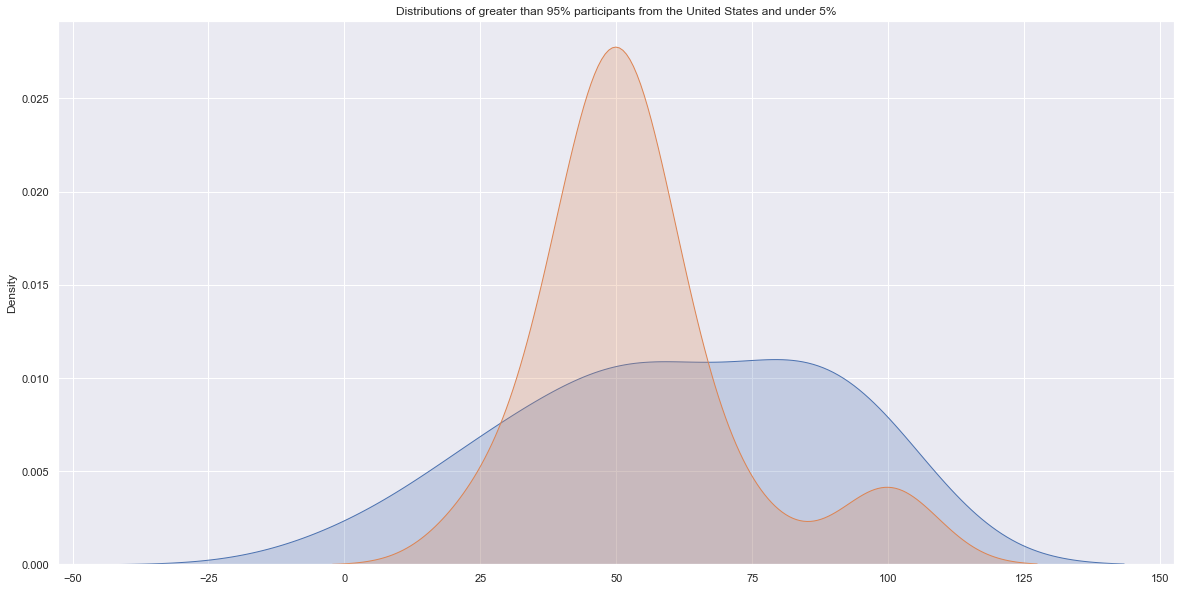

P-Value:0.2887328705535522 T-Statistic:1.073049859779525
Effect size is 0.28088737661823665
Sample Size: 199.928


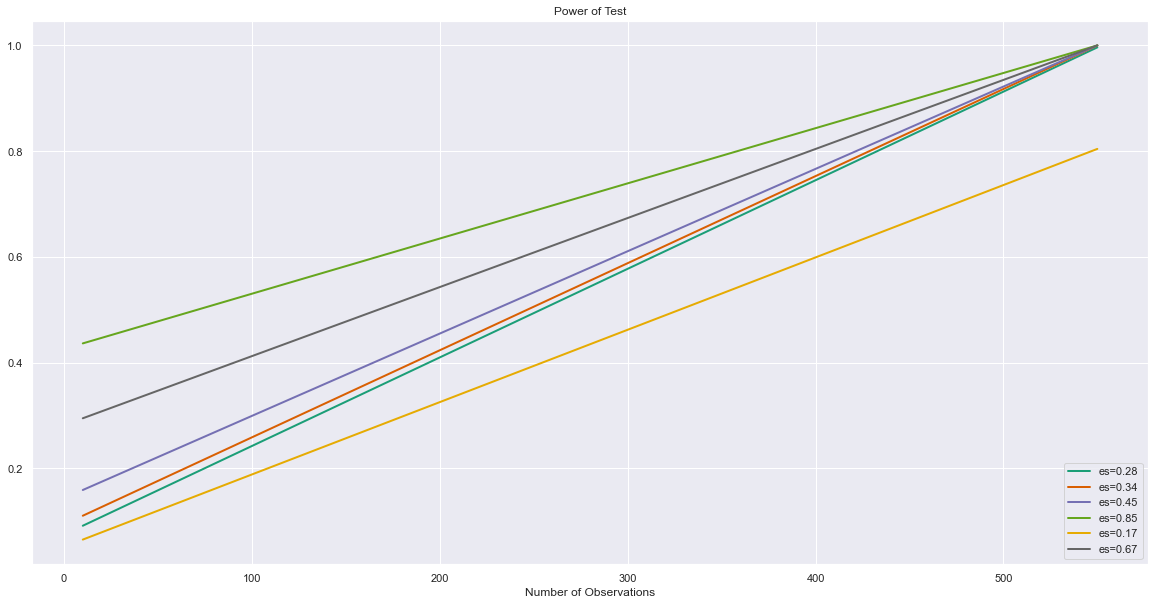

In [30]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['WOMEN'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.28,0.337,0.45,0.85,0.17,0.67])
sample_sizes = array([10,550])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


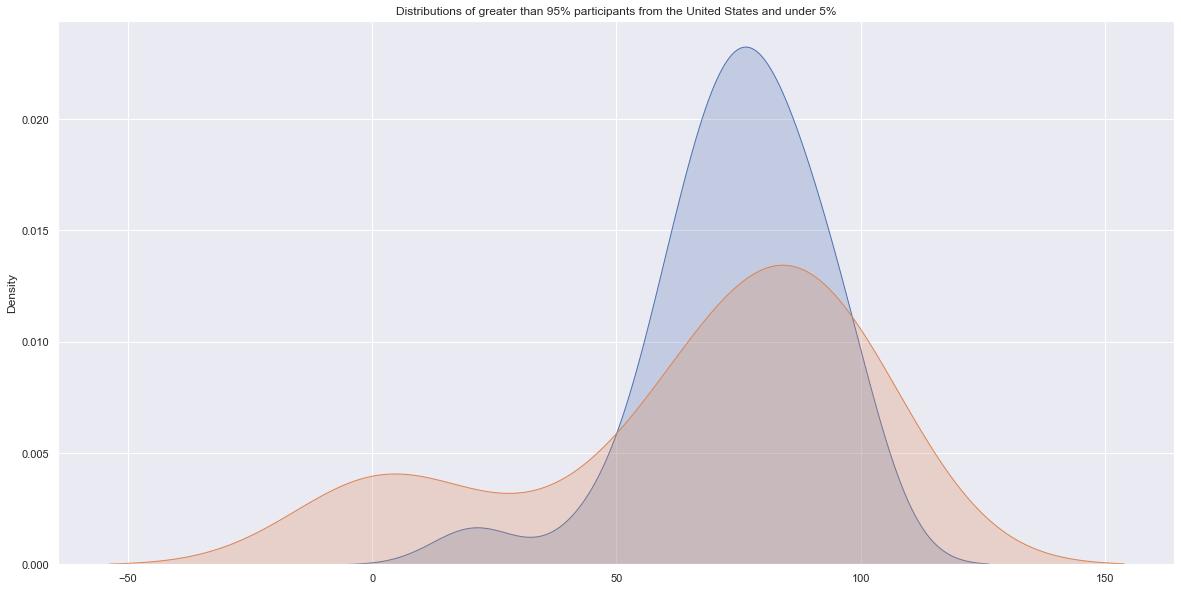

P-Value:0.24451493195781757 T-Statistic:1.1841142445431763
Effect size is 0.3373895659894093
Sample Size: 138.870


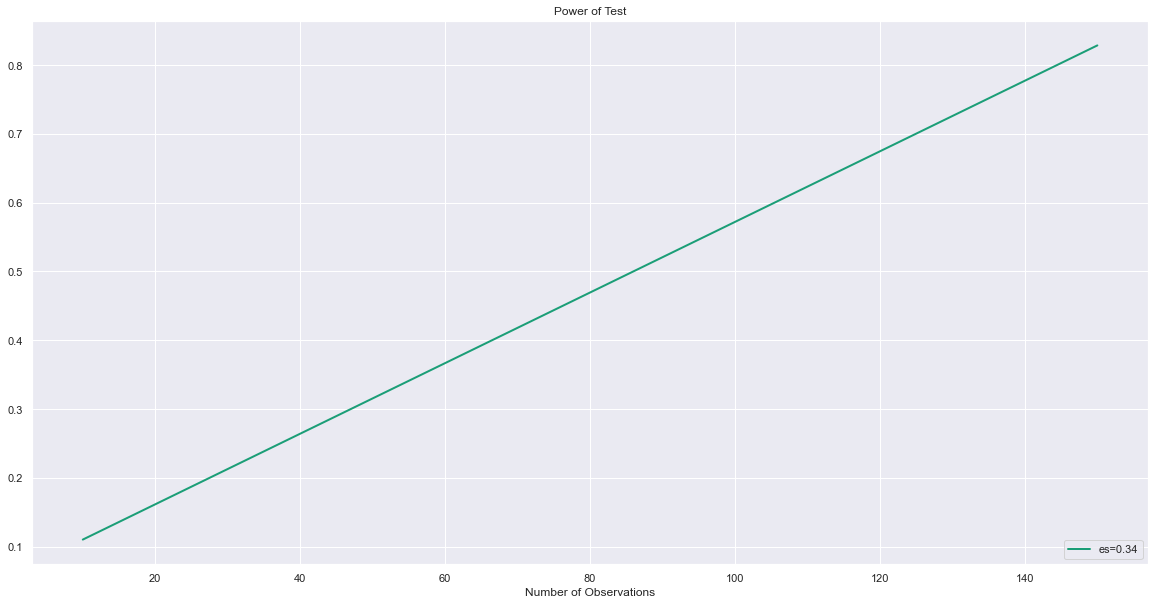

In [15]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['WHITE'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.337])
sample_sizes = array([10,150])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


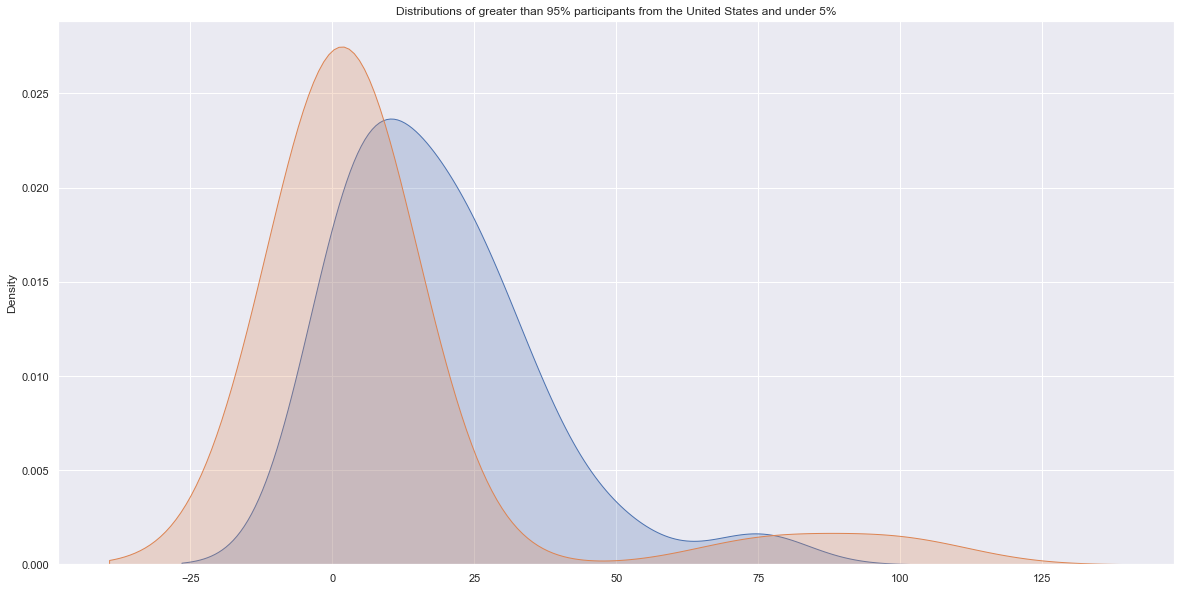

P-Value:0.11971926435211969 T-Statistic:1.5897861554403483
Effect size is 0.4544342647804126
Sample Size: 76.986


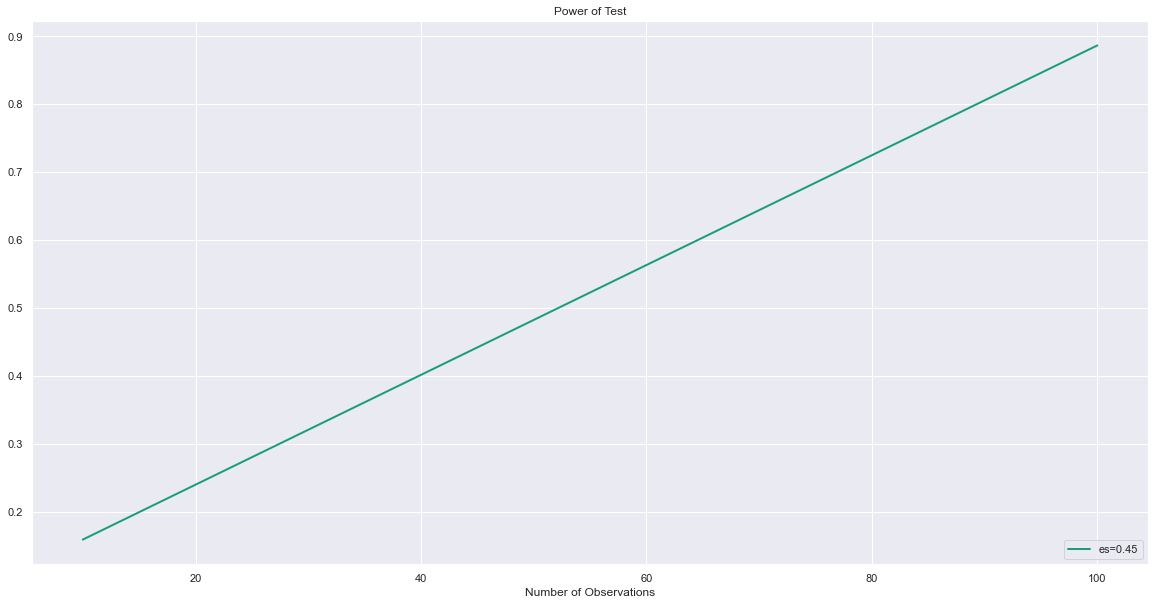

In [18]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['BLACK OR AFRICAN AMERICAN'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.45])
sample_sizes = array([10,100])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


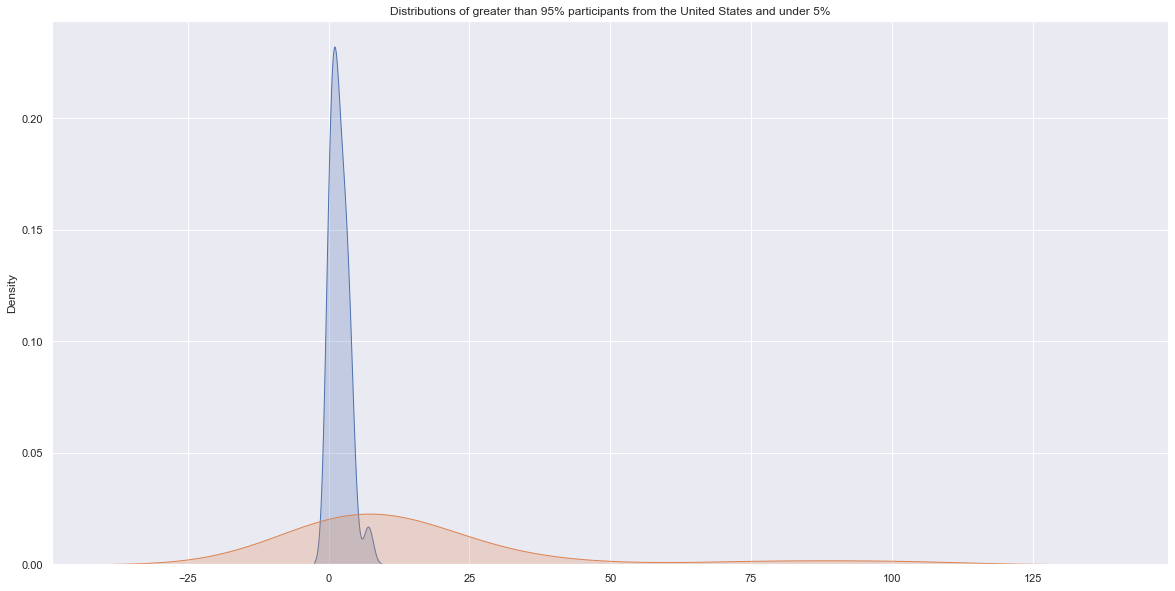

P-Value:0.013040635618662743 T-Statistic:-2.6996198019031636
Effect size is -0.8393511635820711
Sample Size: 23.282


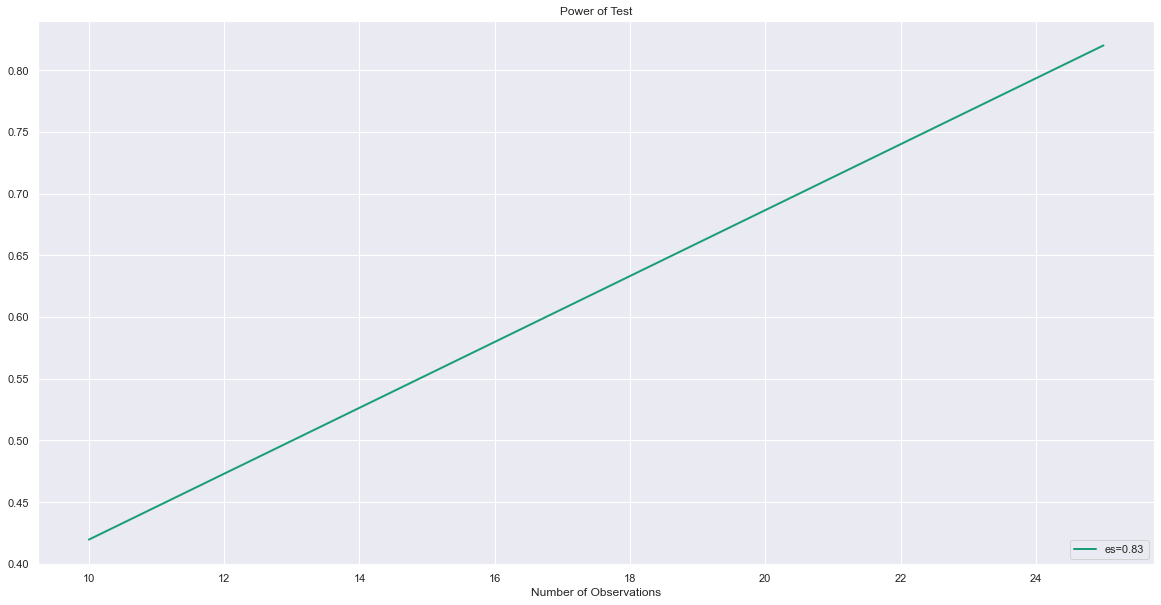

In [20]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['ASIAN'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.83])
sample_sizes = array([10,25])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


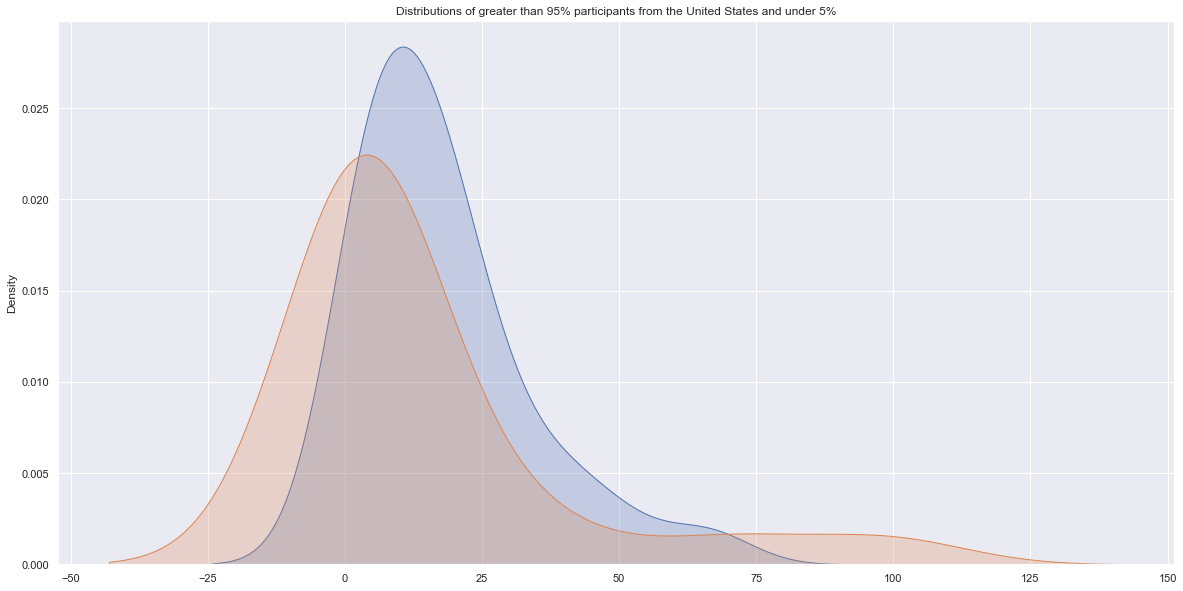

P-Value:0.5976679726027159 T-Statistic:0.5336798493960847
Effect size is 0.16928573557203816
Sample Size: 548.729


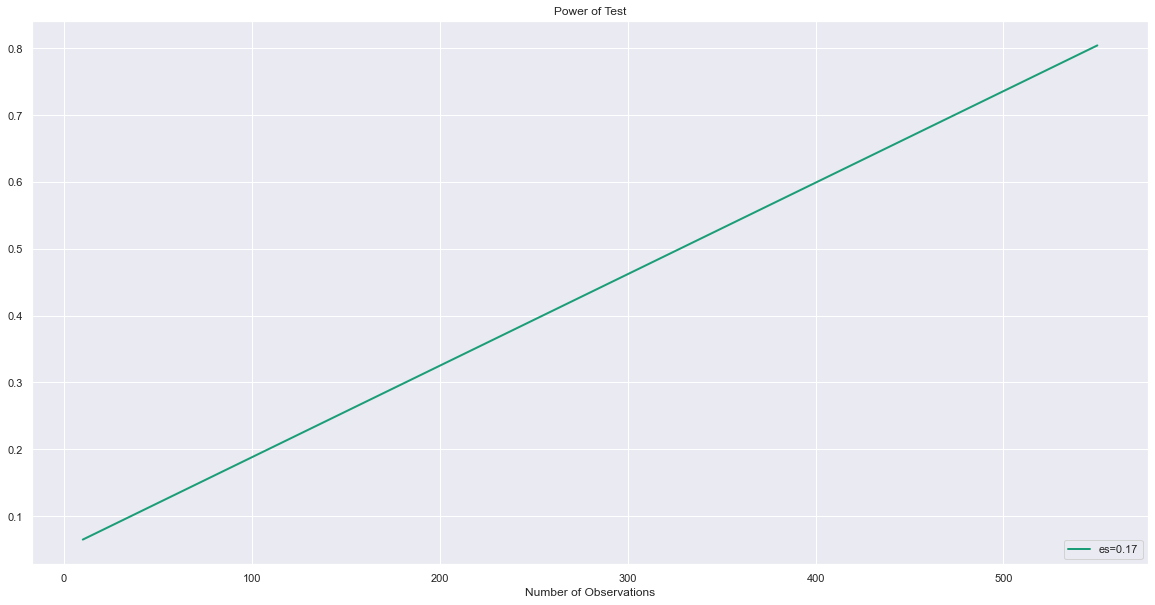

In [23]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['HISPANIC OR LATINO (2017 AND LATER ONLY)'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.17])
sample_sizes = array([10,550])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


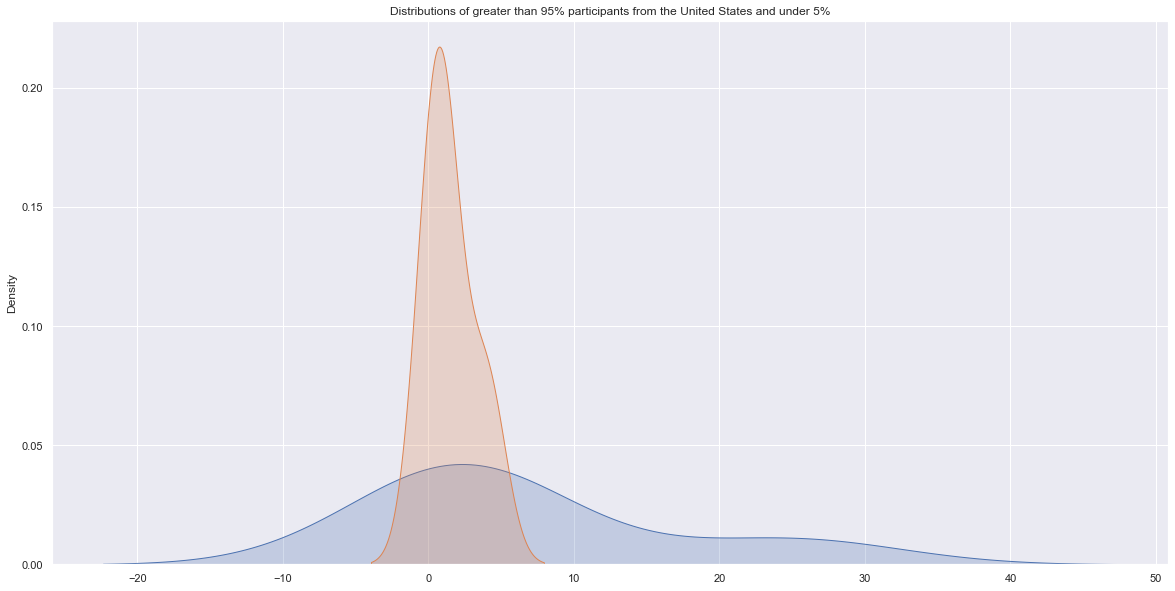

P-Value:0.31671740493018785 T-Statistic:1.132799343920234
Effect size is 0.674813202156374
Sample Size: 35.459


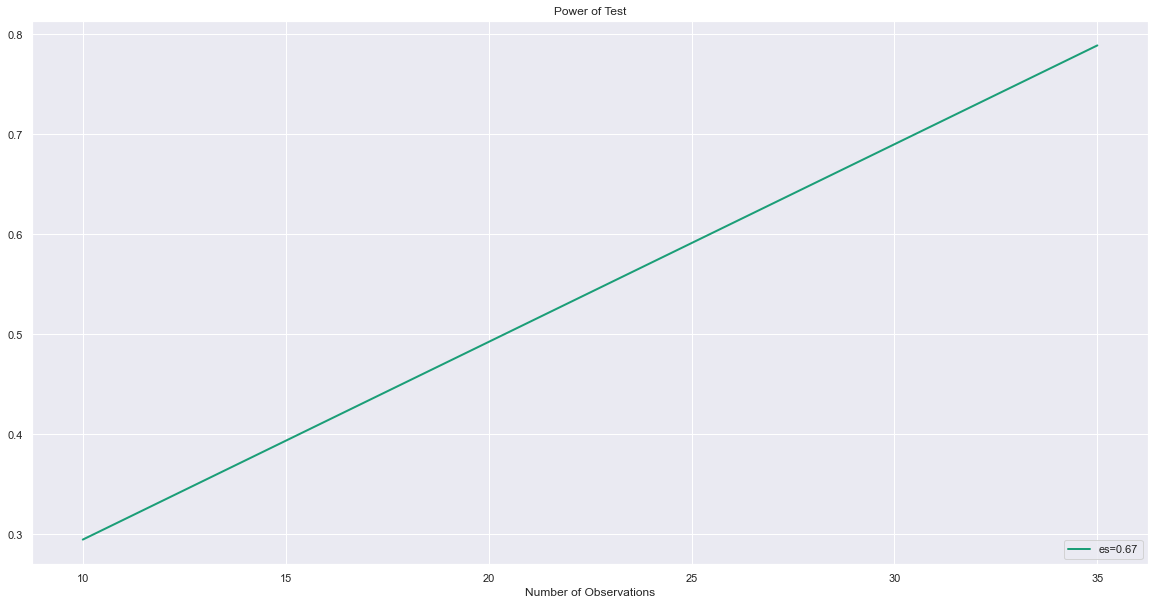

In [25]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['OTHER'], var_name='Category', value_name='Percentage')
melted = melted.dropna()
over95 = melted[melted['USA'] == 'US>95']['Percentage'].to_list()
under5 = melted[melted['USA'] == 'US<5']['Percentage'].to_list()

sns.kdeplot(over95, shade=True)
sns.kdeplot(under5, shade=True)
plt.title("Distributions of greater than 95% participants from the United States and under 5%")
plt.show()


tStat, pValue = stats.ttest_ind(over95, under5, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

effect_size = Cohens_d(over95,under5)
alpha = 0.05
power = 0.8
ratio_ =1
print('Effect size is {0}'.format(effect_size))
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size: %.3f' % sample_size)

effect_sizes = array([0.67])
sample_sizes = array([10,35])
#effect_sizes = array([-0.8,0.16,0.28,0.33, 0.45, 0.67,0.8])
#sample_sizes = array([23.8,77,35.4,138.8,199,548 ])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()


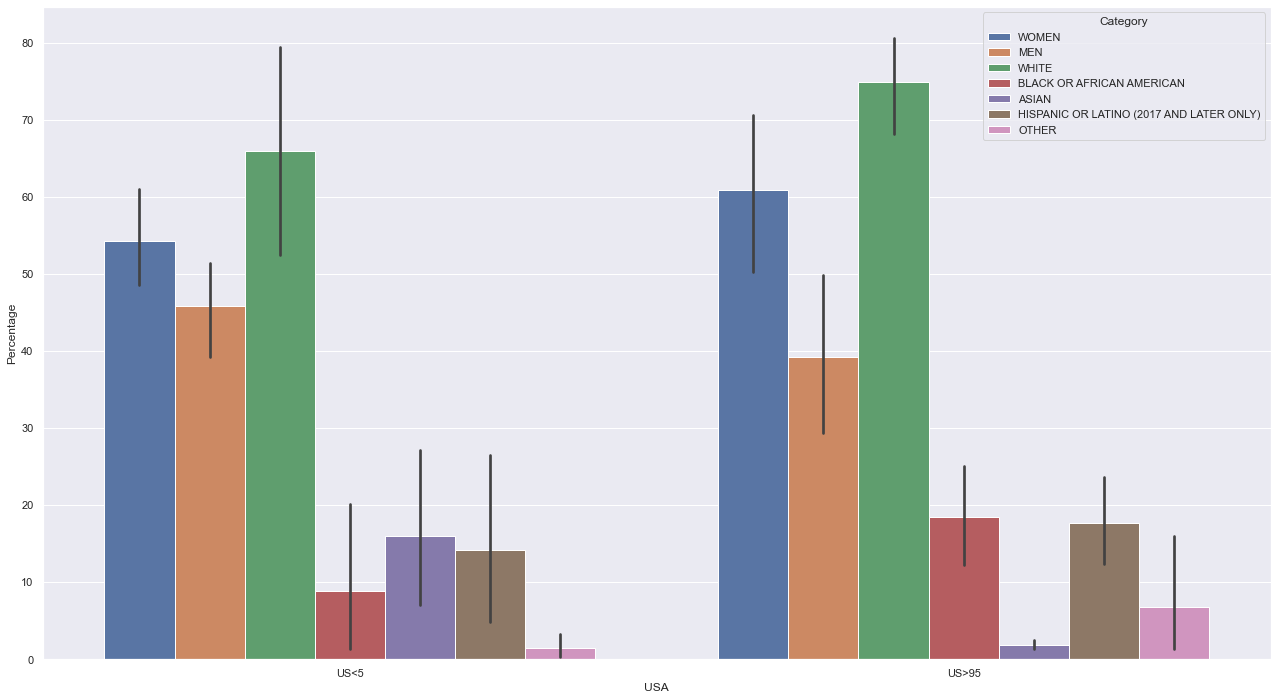

In [141]:
melted = pd.melt(dfUSA, id_vars=['USA'], value_vars=['WOMEN','MEN','WHITE','BLACK OR AFRICAN AMERICAN','ASIAN','OTHER'], var_name='Category', value_name='Percentage')
two_groups = melted.loc[melted['USA'] != '65>USA<45']
sns_plot = sns.barplot(data=two_groups, x='USA' , y='Percentage', hue = 'Category')
fig = sns_plot.get_figure()
fig.savefig("US.png") 

In [ ]:
#EDA T-tests

x = dfo.dropna(subset=['WHITE'])
x = x.dropna(subset=['UNITED STATES (2017 ONLY)'])
x =x[(x['UNITED STATES (2017 ONLY)'].astype(float) > 95)]['WHITE'].astype(float)
tscore, pvalue = ttest_1samp(x, popmean=73)
print("------------")
print("1 sample t-test comparing mean of white participants to mean of white population demographic in united states of 73%")
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

x = dfo.dropna(subset=['BLACK OR AFRICAN AMERICAN'])
x = x.dropna(subset=['UNITED STATES (2017 ONLY)'])
x =x[(x['UNITED STATES (2017 ONLY)'].astype(float) > 95)]['BLACK OR AFRICAN AMERICAN'].astype(float)
tscore, pvalue = ttest_1samp(x, popmean=12.7)
print("------------")
print("1 sample t-test comparing mean of black participants to mean of black population demographic in united states of 12.7%")
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

x = dfo.dropna(subset=['ASIAN'])
x = x.dropna(subset=['UNITED STATES (2017 ONLY)'])
x =x[(x['UNITED STATES (2017 ONLY)'].astype(float) > 95)]['ASIAN'].astype(float)
tscore, pvalue = ttest_1samp(x, popmean=5.4)
print("------------")
print("1 sample t-test comparing mean of asian participants to mean of asian population demographic in united states of 5.4%")
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

x = dfo.dropna(subset=['HISPANIC OR LATINO (2017 AND LATER ONLY)'])
x = x.dropna(subset=['UNITED STATES (2017 ONLY)'])
x =x[(x['UNITED STATES (2017 ONLY)'].astype(float) > 95)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
tscore, pvalue = ttest_1samp(x, popmean=17.6)
print("------------")
print("1 sample t-test comparing mean of hispanic participants to mean of hispanic population demographic in united states of 17.6%")
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

x = dfo.dropna(subset=['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'])
x = x.dropna(subset=['UNITED STATES (2017 ONLY)'])
x =x[(x['UNITED STATES (2017 ONLY)'].astype(float) > 95)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
tscore, pvalue = ttest_1samp(x, popmean=4.8)
print("------------")
print("1 sample t-test comparing mean of other participants to mean of other population demographic in united states of 4.8%")
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

x = dfo.dropna(subset=['WHITE'])
x1 =x[(x['YEAR'].astype(float) == 2015)]['WHITE'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2016)]['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing white trial participant percentage in 2015 to 2016")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2016)]['WHITE'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2017)]['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing white trial participant percentage in 2016 to 2017")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2017)]['WHITE'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2018)]['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing white trial participant percentage in 2017 to 2018")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2018)]['WHITE'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2019)]['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing white trial participant percentage in 2018 to 2019")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2019)]['WHITE'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2020)]['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing white trial participant percentage in 2019 to 2020")
print(sp.ttest_ind(x1, x2, equal_var=False))

x = dfo.dropna(subset=['BLACK OR AFRICAN AMERICAN'])
x1 =x[(x['YEAR'].astype(float) == 2015)]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2016)]['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in 2015 to 2016")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2016)]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2017)]['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in 2016 to 2017")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2017)]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2018)]['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in 2017 to 2018")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2018)]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2019)]['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in 2018 to 2019")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2019)]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2020)]['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in 2019 to 2020")
print(sp.ttest_ind(x1, x2, equal_var=False))

x = dfo.dropna(subset=['ASIAN'])
x1 =x[(x['YEAR'].astype(float) == 2015)]['ASIAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2016)]['ASIAN'].astype(float)
print("------------")
print("2 sample t-test comparing asian trial participant percentage in 2015 to 2016")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2016)]['ASIAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2017)]['ASIAN'].astype(float)
print("------------")
print("2 sample t-test comparing asian trial participant percentage in 2016 to 2017")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2017)]['ASIAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2018)]['ASIAN'].astype(float)
print("------------")
print("2 sample t-test comparing asian trial participant percentage in 2017 to 2018")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2018)]['ASIAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2019)]['ASIAN'].astype(float)
print("------------")
print("2 sample t-test comparing asian trial participant percentage in 2018 to 2019")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2019)]['ASIAN'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2020)]['ASIAN'].astype(float)
print("------------")
print("2 sample t-test comparing asian trial participant percentage in 2019 to 2020")
print(sp.ttest_ind(x1, x2, equal_var=False))

x = dfo.dropna(subset=['HISPANIC OR LATINO (2017 AND LATER ONLY)'])
x1 =x[(x['YEAR'].astype(float) == 2015)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2016)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
print("------------")
print("2 sample t-test comparing hispanic trial participant percentage in 2015 to 2016")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2016)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2017)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
print("------------")
print("2 sample t-test comparing hispanic trial participant percentage in 2016 to 2017")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2017)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2018)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
print("------------")
print("2 sample t-test comparing hispanic trial participant percentage in 2017 to 2018")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2018)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2019)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
print("------------")
print("2 sample t-test comparing hispanic trial participant percentage in 2018 to 2019")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2019)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2020)]['HISPANIC OR LATINO (2017 AND LATER ONLY)'].astype(float)
print("------------")
print("2 sample t-test comparing hispanic trial participant percentage in 2019 to 2020")
print(sp.ttest_ind(x1, x2, equal_var=False))

x = dfo.dropna(subset=['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'])
x1 =x[(x['YEAR'].astype(float) == 2015)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2016)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
print("------------")
print("2 sample t-test comparing other trial participant percentage in 2015 to 2016")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2016)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2017)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
print("------------")
print("2 sample t-test comparing other trial participant percentage in 2016 to 2017")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2017)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2018)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
print("------------")
print("2 sample t-test comparing other trial participant percentage in 2017 to 2018")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2018)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2019)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
print("------------")
print("2 sample t-test comparing other trial participant percentage in 2018 to 2019")
print(sp.ttest_ind(x1, x2, equal_var=False))
x1 =x[(x['YEAR'].astype(float) == 2019)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
x2 =x[(x['YEAR'].astype(float) == 2020)]['ALL OTHER (Aggregated):\nAmerican Indian or Alaska Native (AI/AN), Native Hawaiian or Other Pacific Islander (NH/OPI), Unknown/Unreported'].astype(float)
print("------------")
print("2 sample t-test comparing other trial participant percentage in 2019 to 2020")
print(sp.ttest_ind(x1, x2, equal_var=False))


x = dfo.dropna(subset=['WHITE'])
x1 =x[(x['THERAPEUTIC AREA'] == "HEMATOLOGY")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the hematology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "CARDIOVASCULAR")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the cardiovascular therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "NEUROLOGY")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the neurology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "ONCOLOGY")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the oncology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "IMMUNOLOGY")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the immunology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "PSYCHIATRY & SLEEP DISORDER")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the psychiatry and sleep disorder therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "MENTAL HEALTH")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the mental health therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "DERMATOLOGY")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the dermatology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "INFECTIOUS DISEASE")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the infectious disease therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA']== "ENDOCRINOLOGY & METABOLISM")]['WHITE'].astype(float)
x2 =x['WHITE'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the endocrinology and metabolism therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))


x = dfo.dropna(subset=['BLACK OR AFRICAN AMERICAN'])
x1 =x[(x['THERAPEUTIC AREA'] == "HEMATOLOGY")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the hematology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "CARDIOVASCULAR")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the cardiovascular therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "NEUROLOGY")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the neurology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "ONCOLOGY")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the oncology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "IMMUNOLOGY")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the immunology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "PSYCHIATRY & SLEEP DISORDER")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the psychiatry and sleep disorder therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "MENTAL HEALTH")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the mental health therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "DERMATOLOGY")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the dermatology therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA'] == "INFECTIOUS DISEASE")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the infectious disease therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))

x1 =x[(x['THERAPEUTIC AREA']== "ENDOCRINOLOGY & METABOLISM")]['BLACK OR AFRICAN AMERICAN'].astype(float)
x2 =x['BLACK OR AFRICAN AMERICAN'].astype(float)
print("------------")
print("2 sample t-test comparing black trial participant percentage in the endocrinology and metabolism therapeutic area to the general mean")
print(sp.ttest_ind(x1, x2, equal_var=False))